In [218]:
import numpy as np 
from numpy import asarray as npa 
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import pandas as pd
colour = ['r','g','b']

In [219]:
a = np.zeros((100,))

d = pd.DataFrame({'name': a})
d.to_csv('out.csv', header=True)

In [220]:
pt = 0.025
z = np.meshgrid(np.arange(-1.0, 1.0, pt), np.arange(-1.0, 1.0, pt))
print z[0].shape
print z[1].shape
# print z[0].ravel()
k = np.c_[z[0].ravel(), z[1].ravel()]
print k.shape
sz = k.shape[0]

(100, 100)
(100, 100)
(10000, 2)


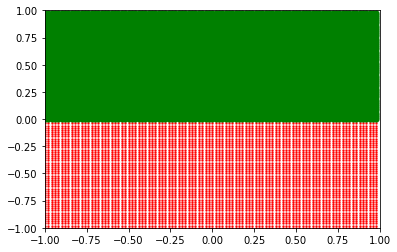

In [221]:
plt.figure(0)
plt.xlim(-1.0, 1.0)
plt.ylim(-1.0, 1.0)
plt.scatter(k[:k.shape[0]/2, 0], k[:k.shape[0]/2, 1], linewidths=0.1, color='red', s=5)
plt.scatter(k[k.shape[0]/2:, 0], k[k.shape[0]/2:, 1], linewidths=0.1, color='green')

In [222]:
def cost(x,y):
    return abs(((x-y)**2).sum())

print cost(npa([1,1]),npa([3.2,4.5]))

17.09


In [223]:
n = 3
m = []
m.append(npa([0.7,-0.6]))
m.append(npa([-0.9,-0.9]))
m.append(npa([0.5,0.3]))

c = []
c.append(np.array([[0.3, 0.0],[0.0, 1.0]]))
c.append(np.array([[0.75, 0.4], [0.4, 0.6]]))
c.append(np.array([[0.3, 0.2], [0.2, 0.6]]))

d = []
for i in range(n):
    d.append(np.random.multivariate_normal(m[i], c[i], 100))

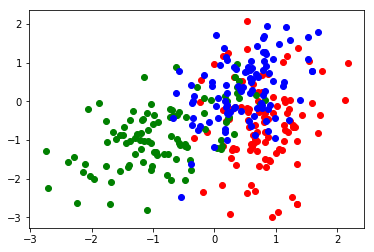

In [224]:
for i in range(n):
    plt.scatter(d[i][:,0],d[i][:,1],color = colour[i])

In [225]:
d = npa(d)
v = np.zeros((d.shape[1]*3,d.shape[2]))

for i in range(d.shape[0]):
    for j in range(d.shape[1]):
        v[i*100+j] = (d[i][j,0],d[i][j,1])

In [226]:
km = KMeans(n_clusters=n)
km.fit(v)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

[ 0.58201468  0.55748545]
[-1.14855891 -1.15573422]
[ 0.65149127 -1.00119944]


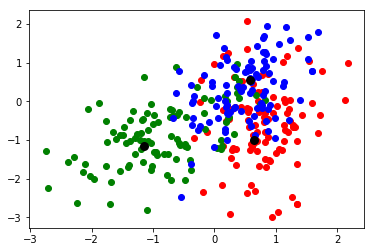

In [227]:
fig = plt.figure()

for i in range(n):
    plt.scatter(d[i][:,0],d[i][:,1],color = colour[i])
for i in range(n):
    plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1], linewidths=3,color = 'black')
    print km.cluster_centers_[i]

In [228]:
print k.shape
klab = np.zeros((k.shape[0]))
centers = [[-0.6,0.3],[0.0,-0.75],[0.75,-0.25]]

for ix in range(sz):
    kv = float('inf')
    for i in range(n):
        v = cost(npa([k[ix][0],k[ix][1]]), centers[i]) #km.cluster_centers_[i])
        if v < kv:
            klab[ix] = i
            kv = v     

(10000, 2)


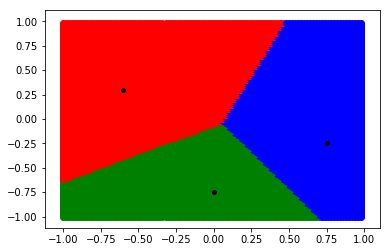

In [229]:
plt.figure(2)
for ix in range(sz):
    plt.scatter(k[ix][0],k[ix][1], color=colour[int(klab[ix])])

for i in range(n):
    plt.scatter(centers[i][0], centers[i][1], color = 'black', s=15)   